In [217]:
import keras
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Convolution2D
from keras.utils import np_utils
import os

In [188]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [220]:
# установка параметров нейросети
batch_size = 512
num_classes = 10
epochs = 5
#data_augmentation = False
num_predictions = 20
#save_dir = os.path.join(os.getcwd(), 'saved_models')
#model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


X_train = X_train / 255.0
X_test = X_test / 255.0

X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


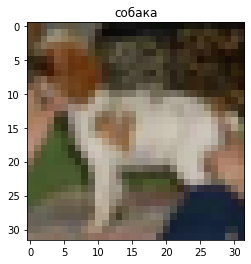

In [190]:
N = 12

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

In [191]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()
# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                      

In [192]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          shuffle=True)

Epoch 1/5
98/98 [==============================] - 93s 915ms/step - loss: 2.3026 - accuracy: 0.1042 - val_loss: 2.2968 - val_accuracy: 0.1082
Epoch 2/5
98/98 [==============================] - 88s 895ms/step - loss: 2.2953 - accuracy: 0.1170 - val_loss: 2.2894 - val_accuracy: 0.1331
Epoch 3/5
98/98 [==============================] - 88s 898ms/step - loss: 2.2844 - accuracy: 0.1320 - val_loss: 2.2705 - val_accuracy: 0.1653
Epoch 4/5
98/98 [==============================] - 89s 906ms/step - loss: 2.2546 - accuracy: 0.1543 - val_loss: 2.2173 - val_accuracy: 0.2061
Epoch 5/5
98/98 [==============================] - 90s 914ms/step - loss: 2.1829 - accuracy: 0.1883 - val_loss: 2.1079 - val_accuracy: 0.2451


1/1 [==============================] - 0s 242ms/step


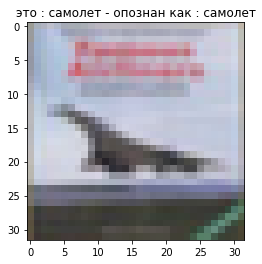

In [193]:
N = 3
y_p = model.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

In [222]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']) 

model.fit(X_train, Y_train, 
          batch_size=512, 
          epochs=20,
          verbose=1, 
          validation_data=(X_test, y_test)) 

loss, metric = model.evaluate(X_test, y_test, batch_size=128)
loss, metric

Epoch 1/20
98/98 [==============================] - 113s 1s/step - loss: 1.7569 - accuracy: 0.3592 - val_loss: 1.4298 - val_accuracy: 0.4849
Epoch 2/20
98/98 [==============================] - 112s 1s/step - loss: 1.3801 - accuracy: 0.5018 - val_loss: 1.2023 - val_accuracy: 0.5638
Epoch 3/20
98/98 [==============================] - 113s 1s/step - loss: 1.2108 - accuracy: 0.5672 - val_loss: 1.1544 - val_accuracy: 0.5899
Epoch 4/20
98/98 [==============================] - 114s 1s/step - loss: 1.0962 - accuracy: 0.6105 - val_loss: 0.9795 - val_accuracy: 0.6529
Epoch 5/20
98/98 [==============================] - 113s 1s/step - loss: 0.9879 - accuracy: 0.6512 - val_loss: 0.8949 - val_accuracy: 0.6806
Epoch 6/20
98/98 [==============================] - 114s 1s/step - loss: 0.9123 - accuracy: 0.6789 - val_loss: 0.8373 - val_accuracy: 0.7061
Epoch 7/20
98/98 [==============================] - 113s 1s/step - loss: 0.8504 - accuracy: 0.7017 - val_loss: 0.8332 - val_accuracy: 0.7107
Epoch 8/20
98

(0.629172682762146, 0.7870000004768372)

1/1 [==============================] - 0s 29ms/step


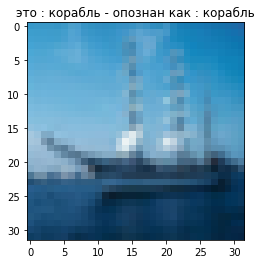

In [241]:
N = np.random.randint(0, X_test.shape[0])
y_p = model.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

In [242]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 5s 17ms/step


In [243]:
CM = confusion_matrix(y_test_labels, y_pred)
print(CM)

[[802  17  48  19  15   5  10   8  45  31]
 [  7 886   2   6   2   1   4   3  15  74]
 [ 48   2 689  43  68  49  66  16  11   8]
 [ 12   7  49 625  44 127  63  39  15  19]
 [ 12   3  63  43 752  27  36  54   8   2]
 [ 12   0  35 167  47 668  20  44   4   3]
 [  4   3  28  45  37  14 858   4   4   3]
 [ 10   3  31  30  35  31   5 841   5   9]
 [ 52  23   9  11   6   1   4   3 872  19]
 [ 28  46   5   7   2   1   3  15  16 877]]


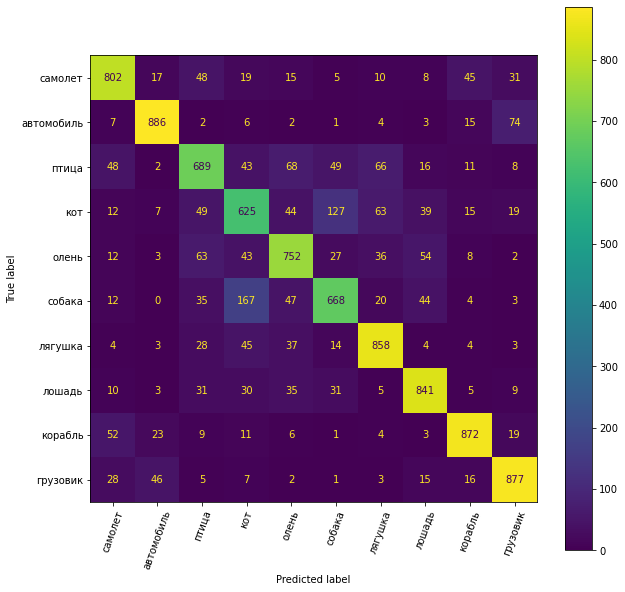

In [244]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=classes)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(values_format='.3g', ax=ax)
plt.xticks(rotation=70)
plt.show();

Больше всего модель путает кота с собакой и наоборот.

<font size = 3><div style="text-align: justify">**Полносвязная сеть:**</div></font>

In [144]:
(X_train, y_train_labels), (X_test, y_test_labels) = cifar10.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1)


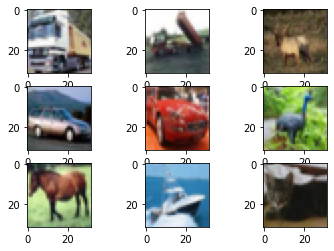

In [145]:
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

Перобразование в 1 канал
Y = 0.299 R + 0.587 G + 0.114 B

In [146]:
#Преобразование X_train
from tqdm import tqdm

Y = [0.299, 0.587, 0.114]
summ_all = []
#t.clear()

for j in tqdm(range(0, 50000, 1)):
    summ = []
    for i in range(0, 32, 1):
        t = []
        for q in range(0, 32, 1):
            f = X_train[j][i][q]
            s = np.sum(np.multiply(f, Y))
            t.append(s)
        summ.append(t)
    summ_all.append(summ)

100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [08:50<00:00, 94.21it/s]


In [147]:
len(summ_all)

50000

In [148]:
X_train = summ_all

In [149]:
#Преобразование X_test
Y = [0.299, 0.587, 0.114]
summ_all = []
#t.clear()

for j in tqdm(range(0, 10000, 1)):
    summ = []
    for i in range(0, 32, 1):
        t = []
        for q in range(0, 32, 1):
            f = X_test[j][i][q]
            s = np.sum(np.multiply(f, Y))
            t.append(s)
        summ.append(t)
    summ_all.append(summ)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:54<00:00, 87.31it/s]


In [150]:
len(summ_all)

10000

In [151]:
X_test = summ_all

In [152]:
# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

In [156]:
X_train = np.array(X_train)
type(X_train)

numpy.ndarray

In [158]:
X_test = np.array(X_test)

In [159]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [160]:
X_train = X_train.reshape((-1, 32 * 32))
X_test = X_test.reshape((-1, 32 * 32))

X_train.shape, X_test.shape

((50000, 1024), (10000, 1024))

In [182]:
model = Sequential()
model.add(Dense(256, input_shape=(32 * 32,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #sigmoid, softmax

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               262400    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 304,202
Trainable params: 304,202
Non-trainable params: 0
_________________________________________________________________


In [183]:
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

model.compile(optimizer='Adam', #SGD, rmsprop, Adam
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=100,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/100
500/500 [==============================] - 4s 6ms/step - loss: 2.0484 - accuracy: 0.2564 - val_loss: 1.9569 - val_accuracy: 0.2984
Epoch 2/100
500/500 [==============================] - 3s 6ms/step - loss: 1.9020 - accuracy: 0.3189 - val_loss: 1.8727 - val_accuracy: 0.3316
Epoch 3/100
500/500 [==============================] - 3s 6ms/step - loss: 1.8380 - accuracy: 0.3431 - val_loss: 1.8096 - val_accuracy: 0.3560
Epoch 4/100
500/500 [==============================] - 3s 6ms/step - loss: 1.7863 - accuracy: 0.3638 - val_loss: 1.7632 - val_accuracy: 0.3773
Epoch 5/100
500/500 [==============================] - 3s 6ms/step - loss: 1.7517 - accuracy: 0.3763 - val_loss: 1.7417 - val_accuracy: 0.3838
Epoch 6/100
500/500 [==============================] - 3s 6ms/step - loss: 1.7099 - accuracy: 0.3905 - val_loss: 1.7264 - val_accuracy: 0.3853
Epoch 7/100
500/500 [==============================] - 3s 6ms/step - loss: 1.6833 - accuracy: 0.4019 - val_loss: 1.7111 - val_accuracy: 0.3912

Epoch 58/100
500/500 [==============================] - 3s 6ms/step - loss: 1.1206 - accuracy: 0.6025 - val_loss: 1.8694 - val_accuracy: 0.4183
Epoch 59/100
500/500 [==============================] - 3s 6ms/step - loss: 1.1160 - accuracy: 0.6041 - val_loss: 1.8598 - val_accuracy: 0.4209
Epoch 60/100
500/500 [==============================] - 3s 6ms/step - loss: 1.1138 - accuracy: 0.6045 - val_loss: 1.8752 - val_accuracy: 0.4215
Epoch 61/100
500/500 [==============================] - 3s 6ms/step - loss: 1.1041 - accuracy: 0.6089 - val_loss: 1.8509 - val_accuracy: 0.4303
Epoch 62/100
500/500 [==============================] - 3s 6ms/step - loss: 1.1002 - accuracy: 0.6101 - val_loss: 1.8971 - val_accuracy: 0.4194
Epoch 63/100
500/500 [==============================] - 3s 6ms/step - loss: 1.0959 - accuracy: 0.6118 - val_loss: 1.8745 - val_accuracy: 0.4262
Epoch 64/100
500/500 [==============================] - 3s 6ms/step - loss: 1.0909 - accuracy: 0.6121 - val_loss: 1.8826 - val_accuracy:

In [184]:
loss, metric = model.evaluate(X_test, y_test, batch_size=128)
loss, metric

79/79 [==============================] - 0s 2ms/step - loss: 2.2142 - accuracy: 0.4105


(2.214240789413452, 0.4104999899864197)

In [185]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred[:10]

313/313 [==============================] - 1s 1ms/step


array([2, 8, 8, 0, 4, 6, 8, 4, 7, 7], dtype=int64)

In [186]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

CM = confusion_matrix(y_test_labels, y_pred)
print(CM)

[[469  29  99  20  98  18  34  31 164  38]
 [ 47 501  20  25  20  25  44  33 137 148]
 [ 96  16 318  86 188  85  90  53  47  21]
 [ 56  42  97 253  99 156 135  64  48  50]
 [102  26 142  48 371  52  95  75  60  29]
 [ 49  19 102 177 100 315  90  74  46  28]
 [ 51  45  79  73 146  53 445  26  47  35]
 [ 62  25  73  70 117  67  47 440  46  53]
 [123  71  30  34  46  23  25  20 585  43]
 [ 44 188  29  48  35  25  49  42 132 408]]


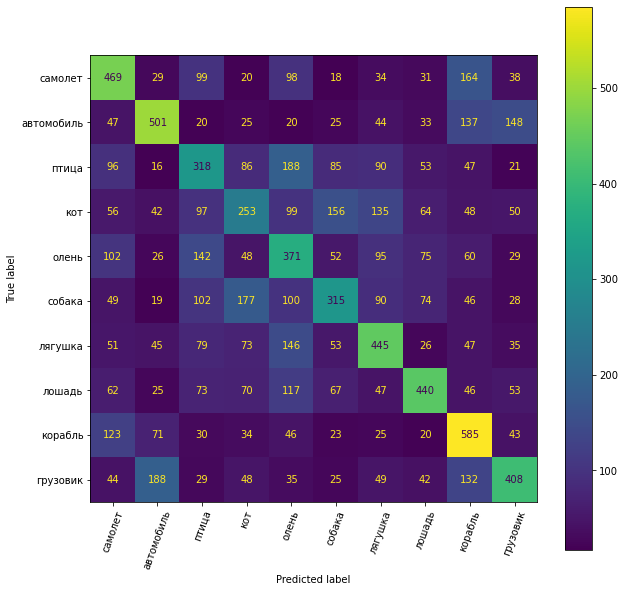

In [187]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=classes)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(values_format='.3g', ax=ax)
plt.xticks(rotation=70)
plt.show();

<font size = 3><div style="text-align: justify">**Вывод:**</div></font>

Сверточные нейронные сети позволяют лучше распозновать картинки. Собранная CNN обучается медленно, для понимания достаточно 20 эпох, примерно с 14 эпохи acc на обучении продолжает расти, но на тесте стабилизируется и начинается переобучение. В целом результат удовлетворительный. Можно сказать, что при увеличении слоев качество на обучении будет расти, но на тесте - нет.